In [ ]:
# Importing library

In [83]:
import os
import librosa
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
#Preprocessing

In [84]:
def extract_mfcc(audio_path, max_pad_len=100):
    audio, sr = librosa.load(audio_path, mono=True)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    return mfccs

def load_data(data_dir):
    labels = []
    mfccs = []
    for label, folder in enumerate(os.listdir(data_dir)):
        for filename in os.listdir(os.path.join(data_dir, folder)):
            if filename.endswith(".wav"):
                audio_path = os.path.join(data_dir, folder, filename)
                mfcc = extract_mfcc(audio_path)
                mfccs.append(mfcc)
                labels.append(label)
    return np.array(mfccs), np.array(labels)

In [85]:
data_dir = "D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\Deep_Learning\\Audio\\data"

In [ ]:
#Load Data

In [86]:
X, y = load_data(data_dir)

In [ ]:
#Split and Encode data

In [87]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Display Audio

In [88]:
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import Audio
data = tf.keras.utils.audio_dataset_from_directory('D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\Deep_Learning\\Audio\\data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
for idx, audio in enumerate(batch[0][:20]):
    display(Audio(audio.astype(int), rate=16000)) 

plt.show()

Found 5188 files belonging to 3 classes.


D:\Anconda\lib\site-packages\IPython\lib\display.py:187: RuntimeWarning: invalid value encountered in divide
  scaled = data / normalization_factor * 32767
D:\Anconda\lib\site-packages\IPython\lib\display.py:188: RuntimeWarning: invalid value encountered in cast
  return scaled.astype("<h").tobytes(), nchan


In [ ]:
#Spectgram

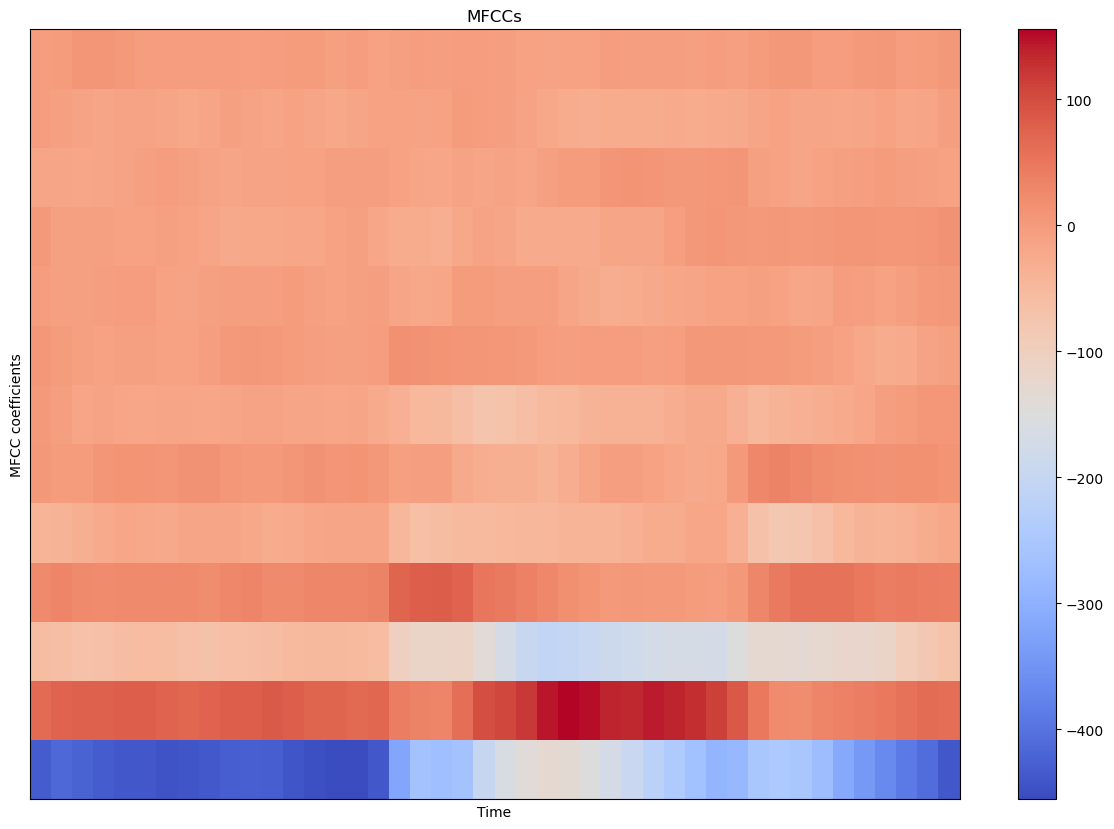

In [89]:

file_path="D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\Deep_Learning\\Audio\\data\\cat\\00b01445_nohash_0.wav"
signal,sample_rate=librosa.load(file_path,sr=22050)
hop_length = 512 
n_fft = 2048 
FIG_SIZE = (15,10)
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()

In [ ]:
#Build Neaural Network

In [90]:
model = Sequential()
model.add(LSTM(units=128, input_shape=(X.shape[1], X.shape[2])))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(units=np.max(y) + 1, activation='softmax'))

In [ ]:
#RUN Nuetwork

In [91]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Trainig model

In [92]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=64)

Epoch 1/150
65/65 [==============================] - 6s 42ms/step - loss: 1.0707 - accuracy: 0.4395 - val_loss: 1.0158 - val_accuracy: 0.4923
Epoch 2/150
65/65 [==============================] - 2s 30ms/step - loss: 0.8742 - accuracy: 0.6005 - val_loss: 0.9544 - val_accuracy: 0.5453
Epoch 3/150
65/65 [==============================] - 2s 30ms/step - loss: 0.7561 - accuracy: 0.6745 - val_loss: 0.9254 - val_accuracy: 0.5501
Epoch 4/150
65/65 [==============================] - 2s 35ms/step - loss: 0.6179 - accuracy: 0.7525 - val_loss: 0.9254 - val_accuracy: 0.5655
Epoch 5/150
65/65 [==============================] - 2s 34ms/step - loss: 0.4940 - accuracy: 0.8092 - val_loss: 0.9656 - val_accuracy: 0.5809
Epoch 6/150
65/65 [==============================] - 2s 33ms/step - loss: 0.3943 - accuracy: 0.8482 - val_loss: 1.0337 - val_accuracy: 0.5896
Epoch 7/150
65/65 [==============================] - 2s 29ms/step - loss: 0.3118 - accuracy: 0.8834 - val_loss: 1.1411 - val_accuracy: 0.6012
Epoch 

In [ ]:
#Evaluting model

In [93]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

33/33 [==============================] - 0s 8ms/step - loss: 2.2191 - accuracy: 0.6513
Test accuracy: 65.13%


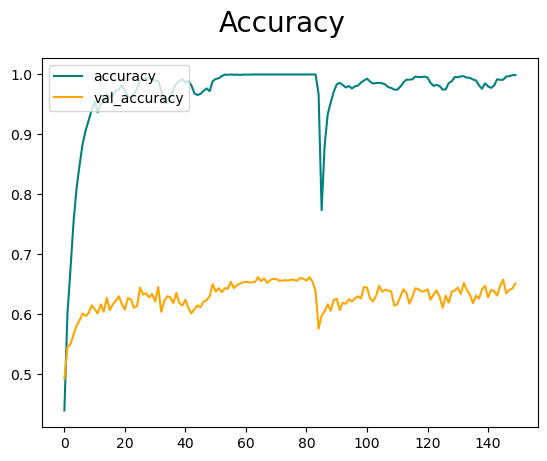

In [94]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

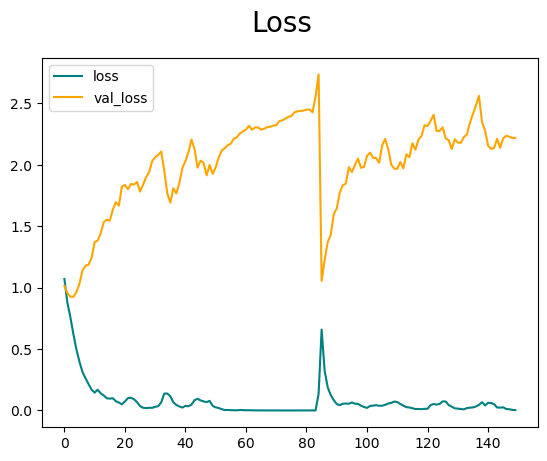

In [95]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [97]:
file_path = "D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\Deep_Learning\\Audio\\data\\cat\\00f0204f_nohash_0.wav"
test_mfcc = extract_mfcc(file_path)
test_mfcc = np.expand_dims(test_mfcc, axis=0) 
predicted_class = np.argmax(model.predict(test_mfcc))
class_labels = ['bed', 'cat', 'dog']
predicted_label = class_labels[predicted_class]

print(f"The predicted class is: {predicted_label}")

1/1 [==============================] - 0s 33ms/step
The predicted class is: cat
